<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects_2/blob/Humera/WEEK_1_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TASK 1: Import necessary libraries

import io
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

In [2]:
# TASK 2: Upload and load hour.csv and day.csv


print("Upload hour dataset (e.g., hour.csv):")
uploaded = files.upload()
hour_fname = next(iter(uploaded))

if hour_fname.lower().endswith('.csv'):
    hour_df = pd.read_csv(io.BytesIO(uploaded[hour_fname]))
else:
    hour_df = pd.read_excel(io.BytesIO(uploaded[hour_fname]))
print("Loaded", hour_fname, "shape:", hour_df.shape)

print("\nUpload day dataset (e.g., day.csv):")
uploaded = files.upload()
day_fname = next(iter(uploaded))
if day_fname.lower().endswith('.csv'):
    day_df = pd.read_csv(io.BytesIO(uploaded[day_fname]))
else:
    day_df = pd.read_excel(io.BytesIO(uploaded[day_fname]))
print("Loaded", day_fname, "shape:", day_df.shape)

Upload hour dataset (e.g., hour.csv):


Saving day.csv to day.csv
Loaded day.csv shape: (731, 16)

Upload day dataset (e.g., day.csv):


Saving hour.csv to hour.csv
Loaded hour.csv shape: (17379, 17)


In [3]:
# Quick peek

display(Markdown("### Hour dataset head"))
display(hour_df.head())
display(Markdown("### Day dataset head"))
display(day_df.head())

### Hour dataset head

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Day dataset head

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# TASK 3: Basic cleaning + type fixes for both datasets

def basic_clean(df, name="df"):
    df = df.copy()
    # Normalize column names
    df.columns = [c.strip() for c in df.columns.astype(str)]
    print(f"\n{name} shape: {df.shape}")
    print("Nulls per column:")
    print(df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())
    # Try parse dteday if present (but we will convert to string later)
    if 'dteday' in df.columns:
        # parse to see if parseable, but don't overwrite original yet
        parsed = pd.to_datetime(df['dteday'], errors='coerce')
        print(f"Parsed 'dteday' in {name}. Parseable count:", parsed.notna().sum())
    return df

hour_df = basic_clean(hour_df, name="hour_df")
day_df  = basic_clean(day_df,  name="day_df")

# Remove 'instant' column if present (unnecessary)
for df, name in [(hour_df, 'hour_df'), (day_df, 'day_df')]:
    if 'instant' in df.columns:
        print(f"Removing 'instant' from {name}")
        df.drop(columns=['instant'], inplace=True)
    if name == 'hour_df':
        hour_df = df
    else:
        day_df = df


hour_df shape: (731, 16)
Nulls per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate rows: 0
Parsed 'dteday' in hour_df. Parseable count: 731

day_df shape: (17379, 17)
Nulls per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate rows: 0
Parsed 'dteday' in day_df. Parseable count: 17379
Removing 'instant' from hour_df
Removing 'instant' from day_df


In [7]:
for df, name in [(hour_df, 'hour_df'), (day_df, 'day_df')]:
    if 'dteday' in df.columns:
        # Convert to datetime first to standardize, then to ISO string (YYYY-MM-DD)
        parsed = pd.to_datetime(df['dteday'], errors='coerce')
        # If parseable, convert to standard YYYY-MM-DD strings; otherwise keep original string representation
        df['dteday'] = np.where(parsed.notna(), parsed.dt.strftime('%Y-%m-%d'), df['dteday'].astype(str))
    if name == 'hour_df':
        hour_df = df
    else:
        day_df = df

# Some columns (weekday, workingday, holiday) sometimes parse to datetime accidentally.
# Convert them back to integer if they appear as datetime but actually are categorical/numeric.
def fix_date_like_columns(df, cols):
    for c in cols:
        if c in df.columns:
            if np.issubdtype(df[c].dtype, np.datetime64):
                # convert datetime64 to integer codes (day part) - fallback
                try:
                    df[c] = df[c].dt.day.astype('Int64')  # keep small int (day part) as a fallback
                except Exception:
                    df[c] = df[c].astype('Int64', errors='ignore')
    return df

check_cols = ['weekday', 'workingday', 'holiday']
hour_df = fix_date_like_columns(hour_df, check_cols)
day_df  = fix_date_like_columns(day_df,  check_cols)

In [8]:
def safe_convert_numeric_like(df):
    df = df.copy()
    for c in df.columns:
        if df[c].dtype == object:
            # test if all non-null values look numeric (allow negative and decimal)
            sample = df[c].dropna().astype(str)
            if len(sample) > 0 and sample.apply(lambda x: x.replace('-', '', 1).replace('.', '', 1).isdigit()).all():
                df[c] = pd.to_numeric(df[c], errors='coerce')
    return df

hour_df = safe_convert_numeric_like(hour_df)
day_df  = safe_convert_numeric_like(day_df)

print("\nFinal dtypes sample (hour_df):")
display(hour_df.dtypes.head(20))
print("\nFinal dtypes sample (day_df):")
display(day_df.dtypes.head(20))



Final dtypes sample (hour_df):


,0
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64
atemp,float64



Final dtypes sample (day_df):


,0
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64



Simple EDA for hour_df (shape: (731, 15))



### hour_df head

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



📌 Summary statistics:


,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500


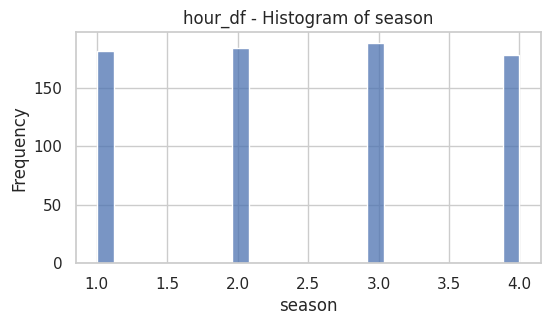

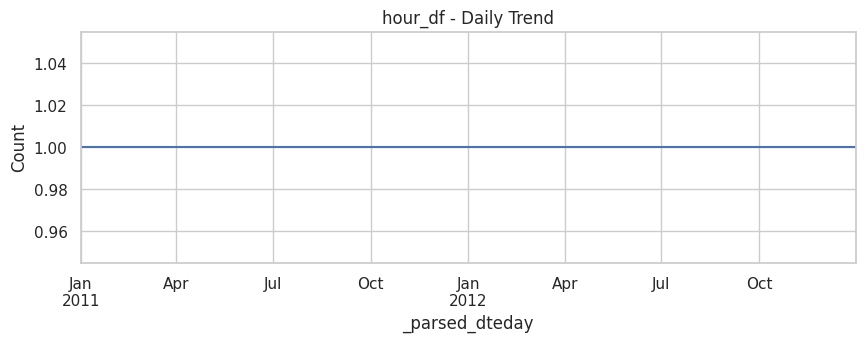


✔ Simple EDA done for hour_df.


Simple EDA for day_df (shape: (17379, 16))



### day_df head

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



📌 Summary statistics:


,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


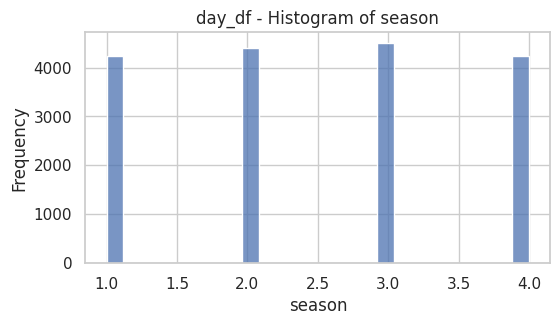

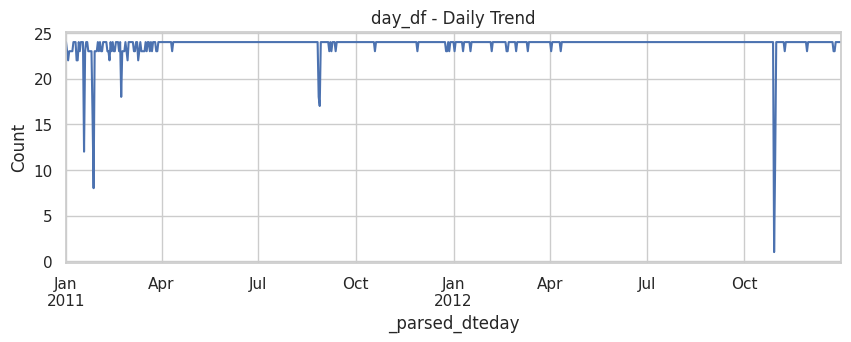


✔ Simple EDA done for day_df.



In [14]:
def simple_eda(df, name="df"):
    print("\n" + "="*40)
    print(f"Simple EDA for {name} (shape: {df.shape})")
    print("="*40 + "\n")

    # Show first rows
    display(Markdown(f"### {name} head"))
    display(df.head())

    # Numeric summary
    num_df = df.select_dtypes(include=[np.number])
    if num_df.shape[1] > 0:
        print("\n📌 Summary statistics:")
        display(num_df.describe().T)
    else:
        print("No numeric columns found.")

    # ----------- SIMPLE VISUALIZATION 1: Histogram -------------
    if num_df.shape[1] > 0:
        col = num_df.columns[0]   # pick first numeric column
        plt.figure(figsize=(6,3))
        sns.histplot(df[col].dropna(), bins=25)
        plt.title(f"{name} - Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

    # ----------- SIMPLE VISUALIZATION 2: Date Trend ------------
    if 'dteday' in df.columns:
        temp_dt = pd.to_datetime(df['dteday'], errors='coerce')
        if temp_dt.notna().sum() > 0:
            tmp = df.copy()
            tmp['_parsed_dteday'] = temp_dt
            daily = tmp.set_index('_parsed_dteday').resample('D').size()

            plt.figure(figsize=(10,3))
            daily.plot()
            plt.title(f"{name} - Daily Trend")
            plt.ylabel("Count")
            plt.show()
        else:
            print("dteday not parseable, skipping daily trend plot.")

    print(f"\n✔ Simple EDA done for {name}.\n")


# Run separately
simple_eda(hour_df, name="hour_df")
simple_eda(day_df,  name="day_df")

/tmp/ipython-input-3803685745.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=hour_df, estimator=np.sum, ci=None)


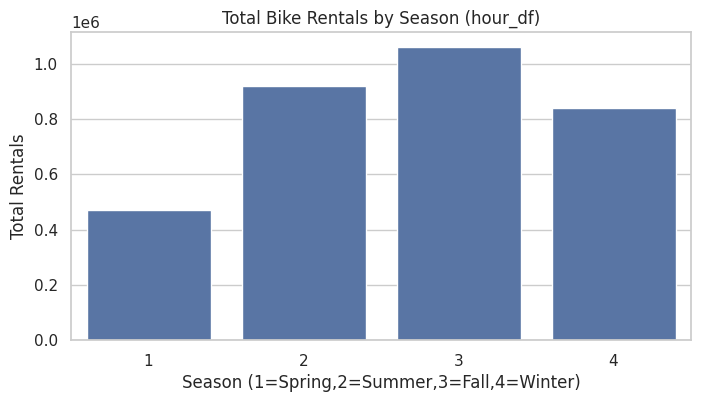

In [10]:
# hour_df: Rentals by season (if season and cnt exist)
if 'season' in hour_df.columns and 'cnt' in hour_df.columns:
    plt.figure(figsize=(8,4))
    sns.barplot(x='season', y='cnt', data=hour_df, estimator=np.sum, ci=None)
    plt.title('Total Bike Rentals by Season (hour_df)')
    plt.xlabel('Season (1=Spring,2=Summer,3=Fall,4=Winter)')
    plt.ylabel('Total Rentals')
    plt.show()


/tmp/ipython-input-774663246.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=hour_df, estimator=np.sum, ci=None)


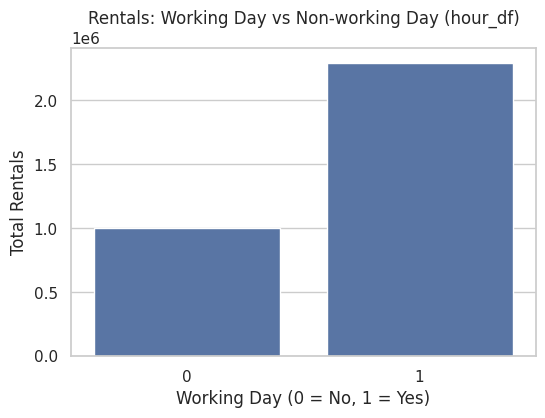

In [11]:
if 'workingday' in hour_df.columns and 'cnt' in hour_df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='workingday', y='cnt', data=hour_df, estimator=np.sum, ci=None)
    plt.title('Rentals: Working Day vs Non-working Day (hour_df)')
    plt.xlabel('Working Day (0 = No, 1 = Yes)')
    plt.ylabel('Total Rentals')
    plt.show()


/tmp/ipython-input-3311678452.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, estimator=np.sum, ci=None)


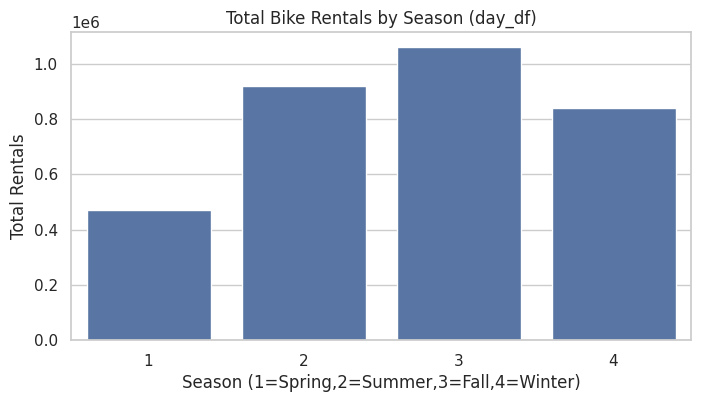

In [12]:
if 'season' in day_df.columns and 'cnt' in day_df.columns:
    plt.figure(figsize=(8,4))
    sns.barplot(x='season', y='cnt', data=day_df, estimator=np.sum, ci=None)
    plt.title('Total Bike Rentals by Season (day_df)')
    plt.xlabel('Season (1=Spring,2=Summer,3=Fall,4=Winter)')
    plt.ylabel('Total Rentals')
    plt.show()